# <code style="background:#6c89cc; color:black">Project Details</code>

The objective of the project is to let students have a hands-on experience on machine 
learning application development, this will help the students to have a better 
understanding on the topics and algorithms learned. Specifically in problem formulation, 
data collection and processing, data analysis, experiment design, machine learning 
methods comparison, performance evaluation, and result analysis. Each group has its 
flexibility to choose its own problem and data.

# <code style="background:#6c89cc; color:black">Problem Background</code>

Diseases are something that plague human beings. The top 10 causes of death in the world are all diseases, not accidents. Out of these 10, 7 of them account for diseases that are noncommunicable. These means that they are diseases that are not transmitted from one person to another. These account for 68% of the top 10 causes of death. If we frame this context at a national level, Singapore shares the same sentiment. The top 10 causes of death are also due to diseases. One such disease that we wanted to explore is stroke as it is in the top 5 causes of death worldwide and in Singappore. By taking into account the age-old idiom, "Prevention is better than cure", we want to delve deep into the details to figure out how to improve one's health.
<br>
<br>
https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death
<br>
https://www.moh.gov.sg/others/resources-and-statistics/principal-causes-of-death

# <code style="background:#6c89cc; color:black">Problem Statement</code>

This project aims to analyse and predict the probability of stroke based of the sourced dataset. They take into account lifestyle habits and medical history to aid with with the analysis of data as well as the training of models.

# <code style="background:#6c89cc; color:black">Data Collection</code>

The dataset used for this problem statement was sourced from Kaggle, a dataset hosting website. It consists of 11 variables, 10 of which are features and 1 of it being the target. The features variables consist of behavioural attributes as well as hereditary attributes that affect a person's probability of getting a stroke.

# <code style="background:#6c89cc; color:black">Load the Libraries</code>

In [1]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
# from flask import Flask, request, render_template
import joblib



from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn import preprocessing

import numpy as np
import seaborn as sns

from matplotlib.pylab import seed

from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
# ...and other regression models

# <code style="background:#6c89cc; color:black">Load the Dataset</code>

We will be using the variable "df" to denote the instances of the dataset. "df" will be called in the following cells and be used for different purposes.

In [2]:
df = pd.read_csv("../Datasets/stroke_data.csv")

In [3]:
df.shape

(40910, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


# <code style="background:#6c89cc; color:black">Data Exploration</code>

In [5]:
#Assessing for missing values
df.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
#Evaluating number of unique values in each column
unique_vals=[]

for col in df.columns:
    unival=df[col].nunique()
    unique_vals.append(unival)

#Presenting the findings using a dataframe
pd.DataFrame(unique_vals,columns=['Unique_Values'],index=df.columns)

,Unique_Values
sex,2
age,111
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,2903
bmi,370
smoking_status,2


In [7]:
df.columns

Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

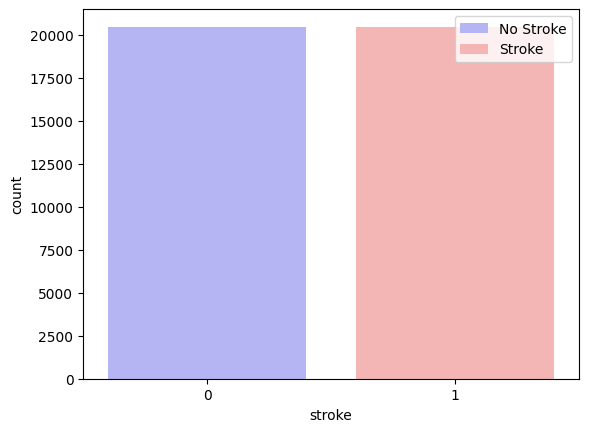

In [8]:
sns.countplot(x="stroke", hue="stroke", data=df, palette="bwr", legend=False)
plt.legend(['No Stroke', 'Stroke'])
plt.show()

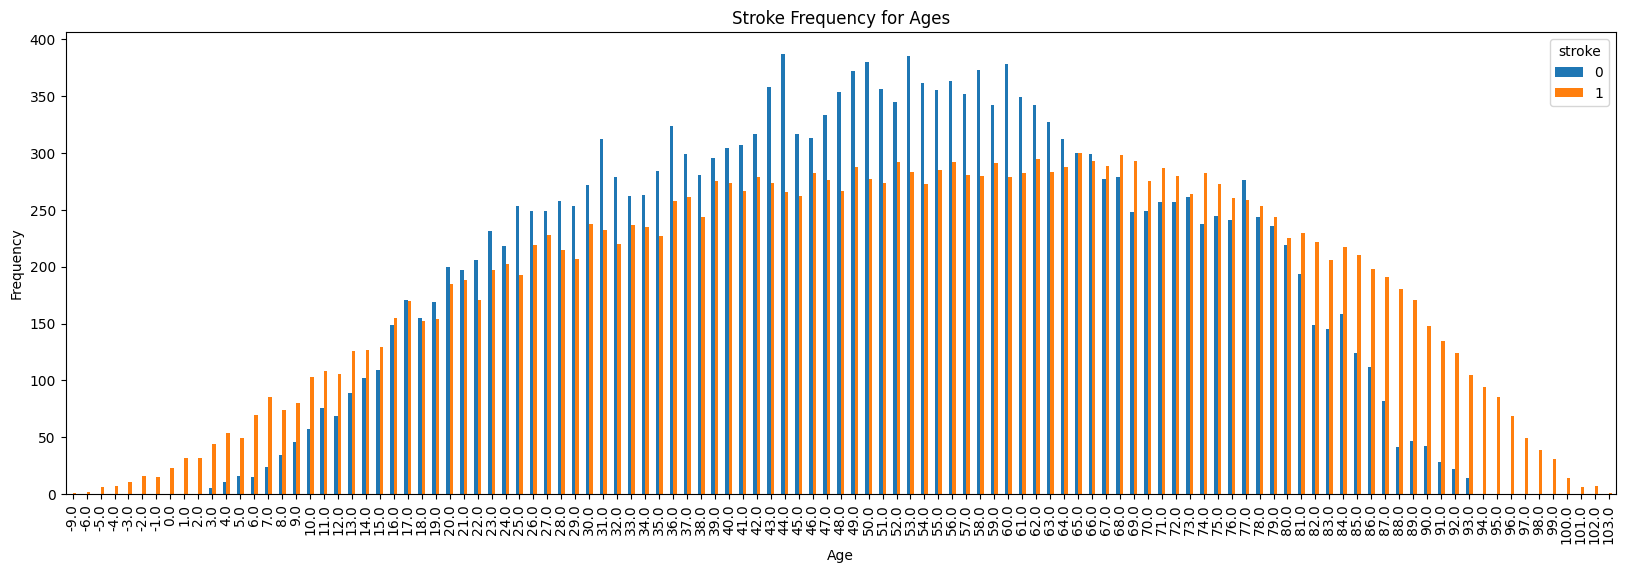

In [9]:
pd.crosstab(df.age,df.stroke).plot(kind="bar",figsize=(20,6))
plt.title('Stroke Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

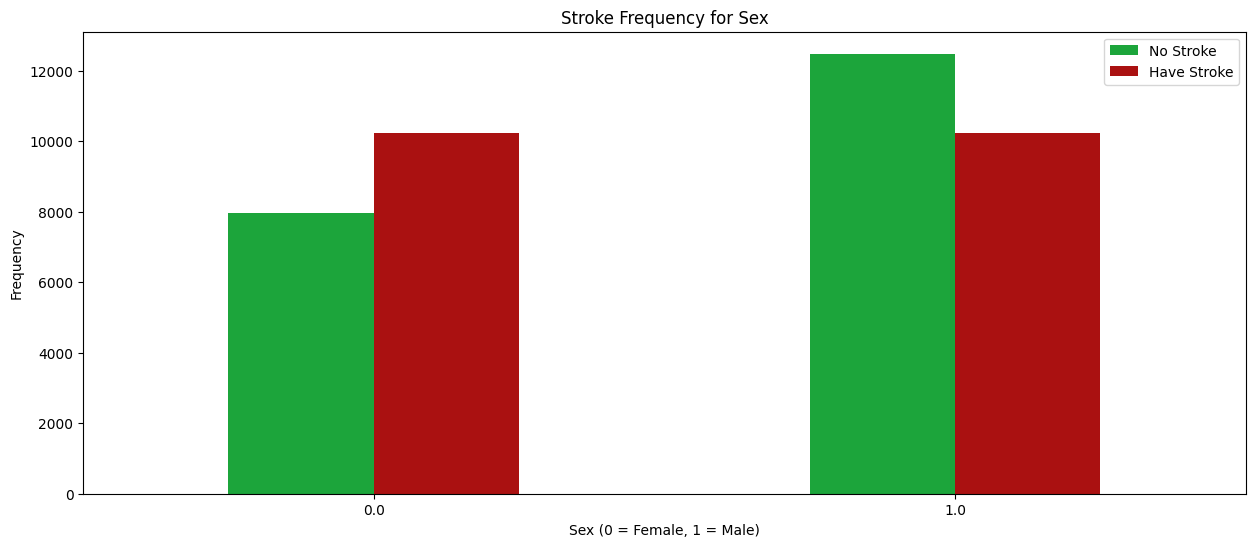

In [10]:
pd.crosstab(df.sex,df.stroke).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Stroke Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Stroke", "Have Stroke"])
plt.ylabel('Frequency')
plt.show()

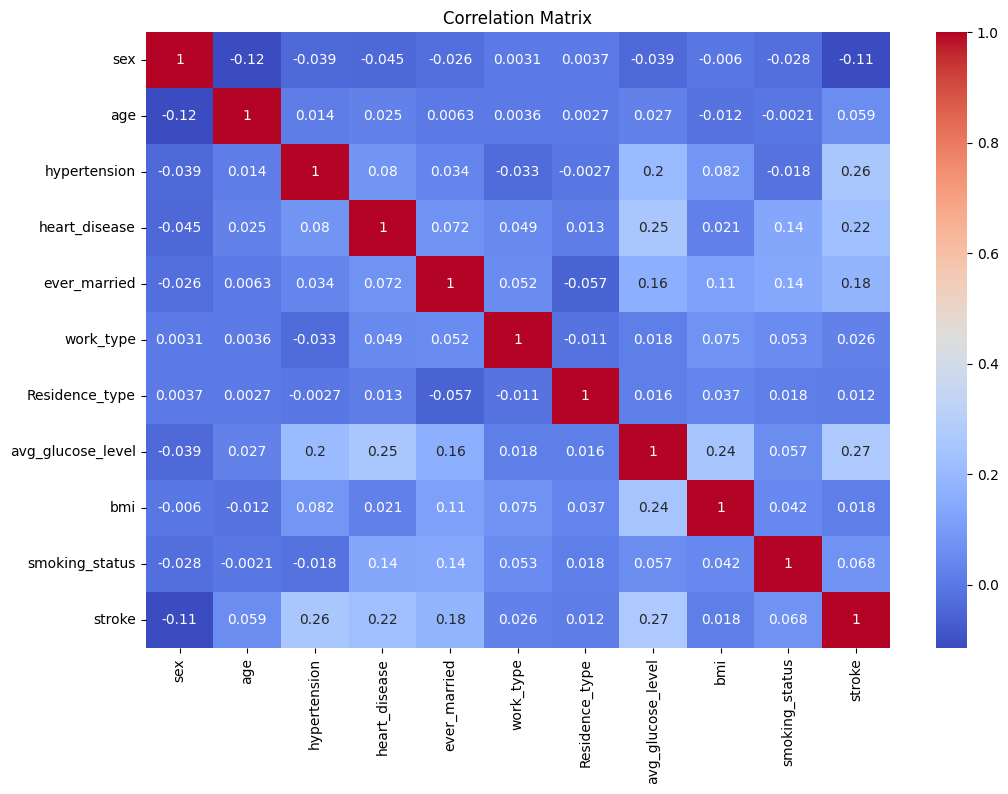

In [11]:
plt.figure(figsize=(12, 8))
non_numeric_cols = df.select_dtypes(include=['object']).columns
numeric_data = df.drop(columns=non_numeric_cols)
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix above, we can rank the 3 features that affect the models the most in order.
<br>
Features ranked from most to least important:
<br>
1. avg_glucose_lvl
<br>
2. hypertension
<br>
3. heart_disease

# <code style="background:#6c89cc; color:black">Feature Engineering</code>

It is important to conduct feature engineering as we want to ensure that the data is well prepped to be used for the training models. It consists of handling missing values, encoding categorial variables and feature scaling to name a few.

Here, we drop the columns with null values and check to ensure that they have been dropped.

In [12]:
df = df.dropna()

In [13]:
df.columns

Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

The bar graph showed us that there were ages that had negative values. This is not physically possible and we have to remove these. So

In [14]:
df.query('age >= 1', inplace=True)

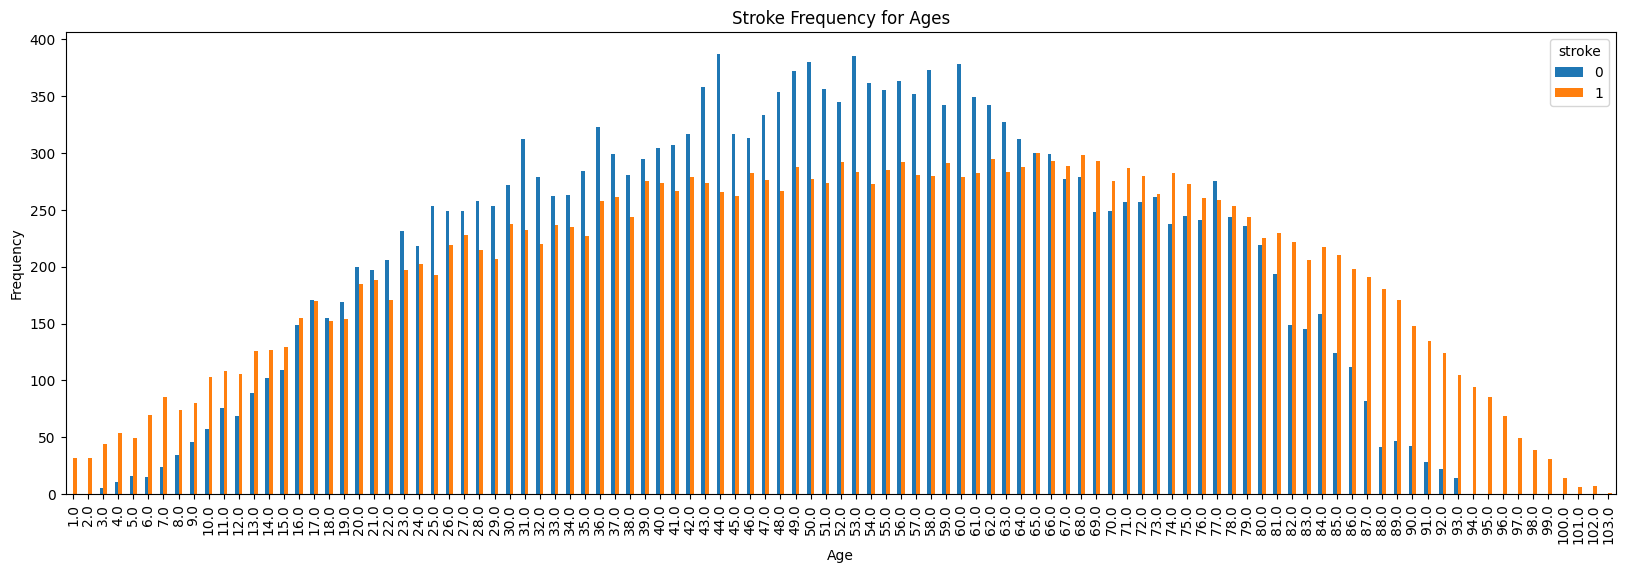

In [15]:
pd.crosstab(df.age,df.stroke).plot(kind="bar",figsize=(20,6))
plt.title('Stroke Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [16]:
df.shape

(40826, 11)

In [17]:
#Assessing for missing values
df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# <code style="background:#6c89cc; color:black">Creating Models</code>

The next step is to create the X and Y arrays. These will then further be split into two more arrays, with each having a "train" and "test" set.

In [ ]:
X = df[['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']].values
y = df['stroke'].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

In [49]:
print(X_train.shape)
print(X_test.shape)

(32660, 10)
(8166, 10)


In [50]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [51]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
ten_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'GBR Classifier': GradientBoostingClassifier(),
    'SGD': SGDClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}

for name, model in ten_models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Training Logistic Regression...
Logistic Regression Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.65      0.75      0.70      4062
           1       0.71      0.61      0.65      4104

    accuracy                           0.68      8166
   macro avg       0.68      0.68      0.68      8166
weighted avg       0.68      0.68      0.68      8166

Training Decision Tree...
Decision Tree Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4062
           1       1.00      1.00      1.00      4104

    accuracy                           1.00      8166
   macro avg       1.00      1.00      1.00      8166
weighted avg       1.00      1.00      1.00      8166

Training Random Forest...
Random Forest Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4062
           1       1.00      1.00      1.00      4104

    a

c:\Users\Akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.69      0.77      0.73      4062
           1       0.74      0.66      0.70      4104

    accuracy                           0.72      8166
   macro avg       0.72      0.72      0.72      8166
weighted avg       0.72      0.72      0.72      8166

Training Naive Bayes...
Naive Bayes Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.63      0.80      0.71      4062
           1       0.73      0.54      0.62      4104

    accuracy                           0.67      8166
   macro avg       0.68      0.67      0.67      8166
weighted avg       0.68      0.67      0.67      8166

Training MLP Neural Network...
MLP Neural Network Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      4062
           1       0.83      0.97      0.89      4104

    accuracy                           0.8

c:\Users\Akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
for name, model in ten_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.68
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
SVM Accuracy: 0.77
KNN Accuracy: 0.87
GBR Classifier Accuracy: 0.80
SGD Accuracy: 0.68


c:\Users\Akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.72
Naive Bayes Accuracy: 0.67
MLP Neural Network Accuracy: 0.89


c:\Users\Akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


c:\Users\Akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


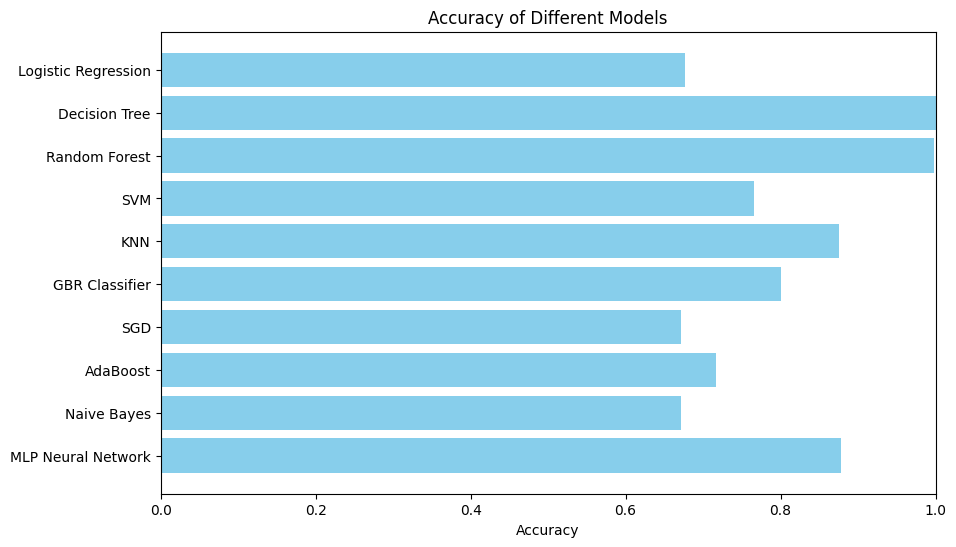

In [ ]:
# Dictionary to store accuracies
accuracies = {}

for name, model in ten_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Create a bar plot for accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis() 
plt.show()

The graph above plots the accuracies of the different models tested. From this we can conclude that the Decision Tree and Random Forest algorithms give the highest accuracy. They both have accuracies of 100%. The next two best models are the MLP Classifier and the K-Nearest Neighbour algorithms with 89% and 87% respectively.
<br>
<br>
Since the Decision Tree and Random Forest output accuracies of 100%, we want to ensure that this isn't due to overfitting. From the correlation matrix above, we can see that the <b>avg_glucose_lvl</b> feature affects the predcition model the most. To test out the efficacy, we will drop this column and train a new model without it.

In [ ]:
X = df[['sex', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'bmi','smoking_status']].values
y = df['stroke'].values

accuracies = {}

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

In [ ]:
no_agl_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'GBR Classifier': GradientBoostingClassifier(),
    'SGD': SGDClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}

for name, model in no_agl_models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Training Logistic Regression...
Logistic Regression Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.63      0.76      0.69      4062
           1       0.70      0.55      0.62      4104

    accuracy                           0.65      8166
   macro avg       0.66      0.65      0.65      8166
weighted avg       0.66      0.65      0.65      8166

Training Decision Tree...
Decision Tree Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4062
           1       0.96      0.95      0.96      4104

    accuracy                           0.96      8166
   macro avg       0.96      0.96      0.96      8166
weighted avg       0.96      0.96      0.96      8166

Training Random Forest...


c:\Users\Akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      4062
           1       0.93      0.96      0.95      4104

    accuracy                           0.95      8166
   macro avg       0.95      0.95      0.95      8166
weighted avg       0.95      0.95      0.95      8166

Training SVM...
SVM Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.63      0.78      0.70      4062
           1       0.72      0.55      0.62      4104

    accuracy                           0.66      8166
   macro avg       0.67      0.67      0.66      8166
weighted avg       0.67      0.66      0.66      8166

Training KNN...
KNN Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.77      0.69      0.73      4062
           1       0.72      0.80      0.76      4104

    accuracy                           0.74      8166
   macro avg       0.75      

c:\Users\Akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.66      0.78      0.72      4062
           1       0.74      0.61      0.67      4104

    accuracy                           0.69      8166
   macro avg       0.70      0.69      0.69      8166
weighted avg       0.70      0.69      0.69      8166

Training Naive Bayes...
Naive Bayes Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.61      0.85      0.71      4062
           1       0.75      0.46      0.57      4104

    accuracy                           0.65      8166
   macro avg       0.68      0.65      0.64      8166
weighted avg       0.68      0.65      0.64      8166

Training MLP Neural Network...
MLP Neural Network Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.68      0.77      0.72      4062
           1       0.74      0.64      0.68      4104

    accuracy                           0.7

c:\Users\Akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
for name, model in no_agl_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

c:\Users\Akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.65
Decision Tree Accuracy: 0.96
Random Forest Accuracy: 0.95
SVM Accuracy: 0.66
KNN Accuracy: 0.74
GBR Classifier Accuracy: 0.76
SGD Accuracy: 0.56


c:\Users\Akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.69
Naive Bayes Accuracy: 0.65
MLP Neural Network Accuracy: 0.72


c:\Users\Akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


c:\Users\Akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


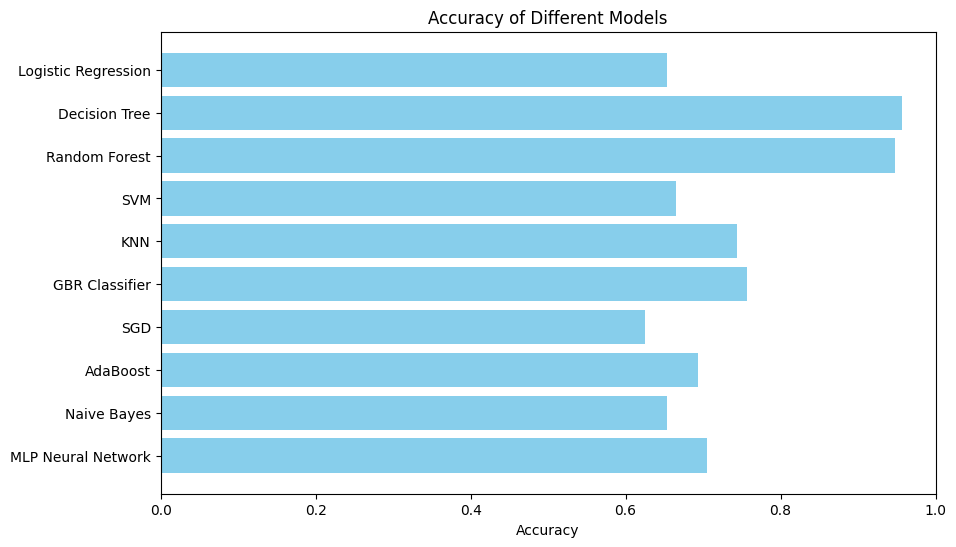

In [ ]:
# Dictionary to store accuracies
accuracies = {}

for name, model in no_agl_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Create a bar plot for accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis() 
plt.show()

As seen in the bar graph, the accuracy of the Decision Tree and Random Forest has dropped. From an initial accuracy of 100% to 96% and 95% respectively. From this, we can conclude that <b>avg_glucose_lvl</b> is an important feature which affects the accuracy of these models. This is also further proved by the fact that the accuracies of the other models have dropped as well. All these informations point towards the fact that the models did not initially overfit as hypothesised. As such, we can use them for prediction.

# <code style="background:#6c89cc; color:black">K-Nearest Neighbours</code>

KNN had an intial accuracy of 87%. We will fine-tune the parameters to try and achieve a higher accuracy.

In [18]:
X = df[['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']].values
y = df['stroke'].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

In [20]:
print(X_train.shape)
print(X_test.shape)

(32660, 10)
(8166, 10)


In [21]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [22]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

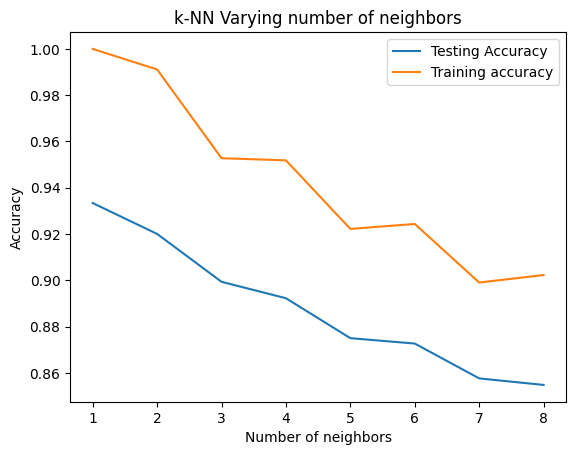

In [24]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [25]:
knn_model = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confusion matrix
[[3331  731]
 [  91 4013]]


Accuracy of K-NeighborsClassifier: 89.9338721528288 

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      4062
           1       0.85      0.98      0.91      4104

    accuracy                           0.90      8166
   macro avg       0.91      0.90      0.90      8166
weighted avg       0.91      0.90      0.90      8166



In [26]:
joblib.dump(knn_model, '../Models/trained_knn.pkl')

['../Models/trained_knn.pkl']

# <code style="background:#6c89cc; color:black">Gradient Boosting Regressor</code>

One of the 10 intial models we tested was the Gradient Boosting Classfier which had an accuracy of 80%. However, we will be trying a different algorithm called the Gradient Boosting Regressor to see if we can output a higher accuracy to use as a model.

In [35]:
X = df[['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']].values
y = df['stroke'].values

accuracies = {}

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

In [37]:
print(X_train.shape)
print(X_test.shape)

(32660, 10)
(8166, 10)


In [38]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [39]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
gbr_model = ensemble.GradientBoostingRegressor(
    n_estimators=1000, # how many decision trees to build
    learning_rate=0.1, #how many decision trees influence overall prediction
    max_depth=6,
    min_samples_leaf=9,
    max_features=0.1,
    loss='huber',
    random_state=7
)
gbr_model.fit(X_train, y_train)

acc = gbr_model.score(X_test,y_test)*100
accuracies['Gradient Boosting Regressor'] = acc
print("Test Accuracy of GBR Algorithm: {:.2f}%".format(acc))

Test Accuracy of GBR Algorithm: 89.99%


In [90]:
# train the GBR model with Grid Search
gs_gbr_model = ensemble.GradientBoostingRegressor()
param_grid = {
    'n_estimators': [100, 500],
    'learning_rate': [0.1, 0.05, 0.02],
    'max_depth': [4, 6],
    'min_samples_leaf': [3, 5, 9, 17],
    'max_features': [1.0, 0.3, 0.1],
    'loss': ['squared_error', 'absolute_error', 'huber']  # Updated loss function names for newer scikit-learn versions
}

gs_cv = GridSearchCV(gs_gbr_model, param_grid, n_jobs=4)
gs_cv.fit(X_train, y_train)

print(gs_cv.best_params_)

KeyboardInterrupt: 

GBR with Grid Search parameters

In [42]:
# GBR with Grid Search
trained_gs_gbr_model = ensemble.GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    min_samples_leaf=3,
    max_features=1.0,
    loss='huber',
    random_state=7
)

trained_gs_gbr_model.fit(X_train, y_train)

acc = trained_gs_gbr_model.score(X_test,y_test)*100
accuracies['Gradient Boosting Regressor with Grid Search'] = acc
print("Test Accuracy of GBR Algorithm: {:.2f}%".format(acc))

Test Accuracy of GBR Algorithm: 96.71%


In [43]:
joblib.dump(trained_gs_gbr_model, '../Models/trained_gs_gbr.pkl')

['../Models/trained_gs_gbr.pkl']

# <code style="background:#6c89cc; color:black">MLP</code>

In [44]:
X = df[['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']].values
y = df['stroke'].values

accuracies = {}

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

In [46]:
print(X_train.shape)
print(X_test.shape)

(32660, 10)
(8166, 10)


In [47]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [48]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
# Training the MLP model
trained_mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 100),
    max_iter=1000,
    early_stopping=True
)

trained_mlp_model.fit(X_train, y_train)
y_pred = trained_mlp_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"MLP Neural Network Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

MLP Neural Network Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      4062
           1       0.93      0.99      0.96      4104

    accuracy                           0.96      8166
   macro avg       0.96      0.96      0.96      8166
weighted avg       0.96      0.96      0.96      8166



In [51]:
joblib.dump(trained_mlp_model, '../Models/trained_mlp.pkl')

['../Models/trained_mlp.pkl']

In [59]:
# These are the feature labels from our data set
feature_labels = np.array(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'])

# Load the trained model created with train_model.py
fi_model = joblib.load('../Models/trained_gs_gbr.pkl')

# Create a numpy array based on the model's feature importances
importance = fi_model.feature_importances_

# Sort the feature labels based on the feature importance rankings from the model
feature_indexes_by_importance = importance.argsort()

# Print each feature label, from most important to least important (reverse order)
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))

sex - 0.89%
Residence_type - 2.16%
age - 2.50%
smoking_status - 2.71%
heart_disease - 3.57%
work_type - 3.89%
hypertension - 5.67%
ever_married - 5.75%
bmi - 25.39%
avg_glucose_level - 47.47%


# <code style="background:#6c89cc; color:black">Decision Tree</code>

In [72]:
X = df[['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']].values
y = df['stroke'].values

accuracies = {}

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

In [74]:
print(X_train.shape)
print(X_test.shape)

(32660, 10)
(8166, 10)


In [75]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [76]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
dt_model = DecisionTreeClassifier(max_depth=None, random_state=None, criterion='entropy')

dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4062
           1       1.00      1.00      1.00      4104

    accuracy                           1.00      8166
   macro avg       1.00      1.00      1.00      8166
weighted avg       1.00      1.00      1.00      8166



In [78]:
joblib.dump(dt_model, '../Models/trained_dt.pkl')

['../Models/trained_dt.pkl']

# <code style="background:#6c89cc; color:black">Random Forest</code>

In [79]:
X = df[['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']].values
y = df['stroke'].values

accuracies = {}

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

In [81]:
print(X_train.shape)
print(X_test.shape)

(32660, 10)
(8166, 10)


In [82]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [83]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=5)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4062
           1       1.00      1.00      1.00      4104

    accuracy                           1.00      8166
   macro avg       1.00      1.00      1.00      8166
weighted avg       1.00      1.00      1.00      8166



In [85]:
joblib.dump(rf_model, '../Models/trained_rf.pkl')

['../Models/trained_rf.pkl']

# <code style="background:#6c89cc; color:black">Predictions with Models</code>

Use the trained models to make predictions

The following is a sample data that represents a person who has features that should point towards a lower likelihood of stroke

In [8]:
# Load the model we trained previously
prediction_model_1 = joblib.load('../Models/trained_rf.pkl')

person_with_high_agl = [
    0,      # sex
    20,     # age
    1,      # hypertension
    0,      # heart_disease
    1,      # evermarried 
    4,      # work_type
    0,    # residence_type
    70,      # avg_glucose_level
    22,      # bmi
    1,      # smoking_status
]

person_to_predict = [
    person_with_high_agl
]

predicted_patient_presence = prediction_model_1.predict(person_to_predict)
predicted_presence = predicted_patient_presence[0]

# Get probability estimates for each class
predicted_probabilities = prediction_model_1.predict_proba(person_to_predict)
probability_of_stroke = predicted_probabilities[0][1]  # Probability of class 1 (has stroke)

print(f"Predicted class: {predicted_presence} (0=No Stroke, 1=Stroke)")
print(f"Probability of stroke: {probability_of_stroke:.4f} or {probability_of_stroke*100:.2f}%")

# If you want to see probabilities for both classes
print(f"Class probabilities: No Stroke: {predicted_probabilities[0][0]:.4f}, Stroke: {predicted_probabilities[0][1]:.4f}")

Predicted class: 1 (0=No Stroke, 1=Stroke)
Probability of stroke: 0.5100 or 51.00%
Class probabilities: No Stroke: 0.4900, Stroke: 0.5100


The following is a sample data that represents a person who has features that should point towards a higher likelihood of stroke

In [6]:
# Load the model we trained previously
prediction_model_2 = joblib.load('../Models/trained_rf.pkl')

person_with_low_agl = [
    1,      # sex
    35,     # age
    0,      # hypertension
    0,      # heart_disease
    1,      # evermarried 
    3,      # work_type
    1,    # residence_type
    100,      # avg_glucose_level
    22,      # bmi
    1,      # smoking_status
]

person_to_predict = [
    person_with_low_agl
]

predicted_patient_presence = prediction_model_2.predict(person_to_predict)
predicted_presence = predicted_patient_presence[0]

# Get probability estimates for each class
predicted_probabilities = prediction_model_2.predict_proba(person_to_predict)
probability_of_stroke = predicted_probabilities[0][1]  # Probability of class 1 (has stroke)

print(f"Predicted class: {predicted_presence} (0=No Stroke, 1=Stroke)")
print(f"Probability of stroke: {probability_of_stroke:.4f} or {probability_of_stroke*100:.2f}%")

# If you want to see probabilities for both classes
print(f"Class probabilities: No Stroke: {predicted_probabilities[0][0]:.4f}, Stroke: {predicted_probabilities[0][1]:.4f}")

Predicted class: 1 (0=No Stroke, 1=Stroke)
Probability of stroke: 0.5300 or 53.00%
Class probabilities: No Stroke: 0.4700, Stroke: 0.5300
